In [2]:
# Ensure plotly is available in the notebook environment
%pip install plotly --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\srees\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [4]:
df=pd.read_csv('Titanic-Dataset.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

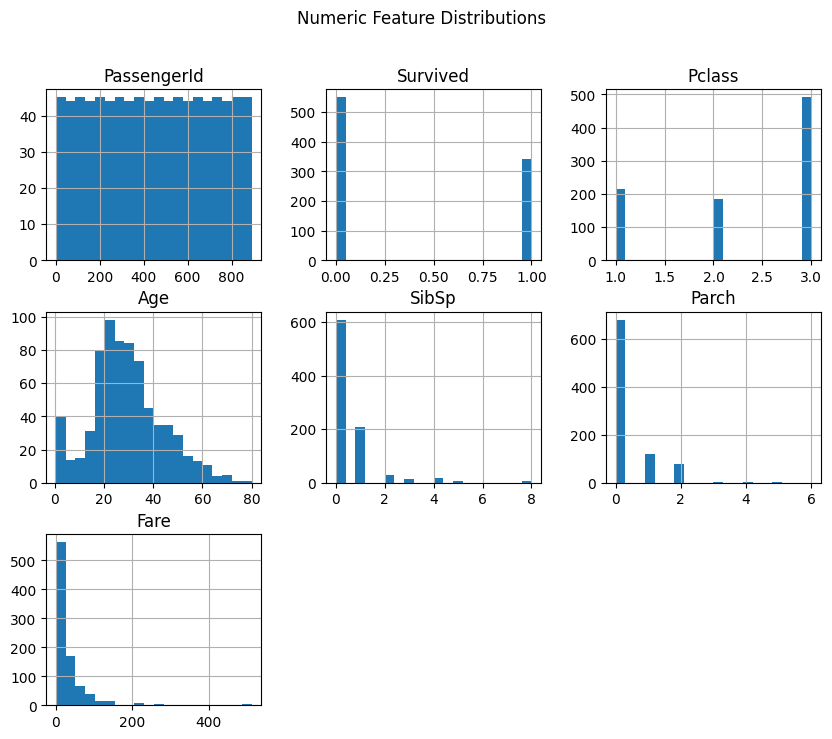

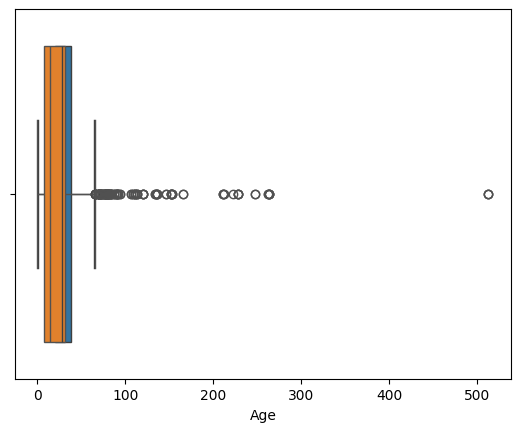

In [9]:
df.hist(figsize=(10,8), bins=20)
plt.suptitle("Numeric Feature Distributions")
plt.show()

sns.boxplot(x=df['Age'])
sns.boxplot(x=df['Fare'])
plt.show()

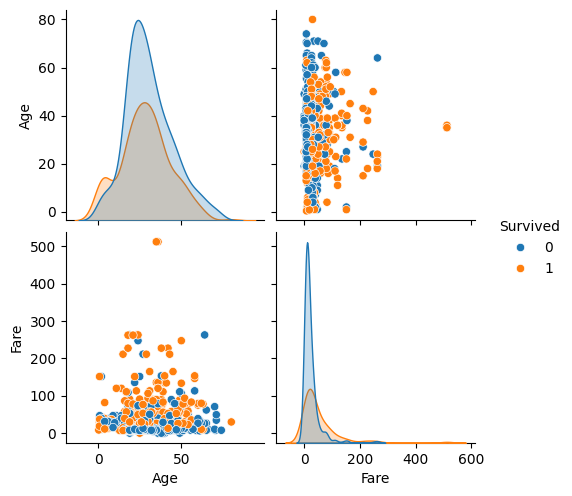

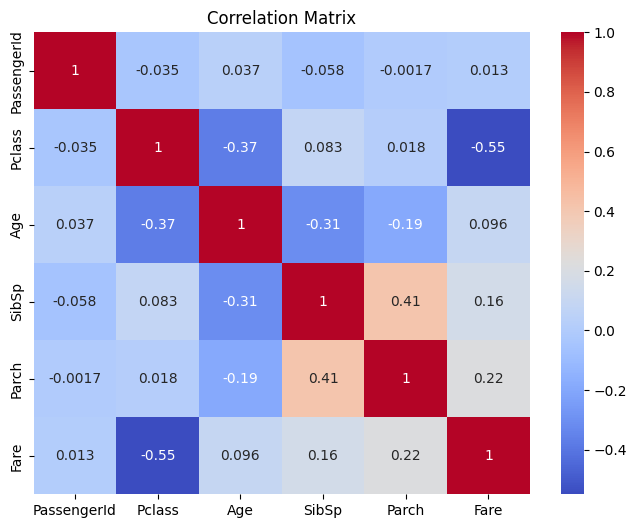

Plotly figure created; call fig.show() in a compatible renderer to view it.


In [15]:
# Ensure Age and Fare are numeric (coerce parsing errors to NaN) and Survived is categorical
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
df['Survived'] = df['Survived'].astype('category')

# Use a cleaned subset for plotting to avoid non-numeric or malformed values
plot_df = df[['Age', 'Fare', 'Survived']].dropna()

# Pairplot (cleaned)
sns.pairplot(plot_df, hue='Survived', diag_kind='kde')
plt.show()

# Correlation matrix based on numeric columns only
plt.figure(figsize=(8,6))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Plotly histogram using the cleaned subset (safe show)
fig = px.histogram(plot_df, x='Age', color='Survived', barmode='overlay',
                   title='Age Distribution by Survival Status',
                   labels={'Age':'Age', 'count':'Count', 'Survived':'Survival Status'})
try:
    fig.show()
except Exception:
    # fallback for environments where plotly renderers may not be available
    print("Plotly figure created; call fig.show() in a compatible renderer to view it.")

PassengerId    0.000000
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64


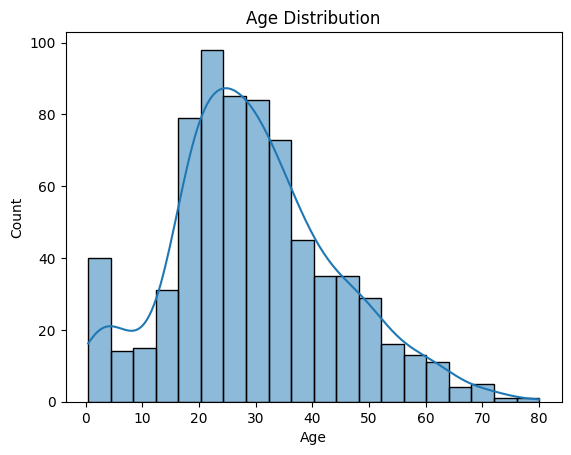

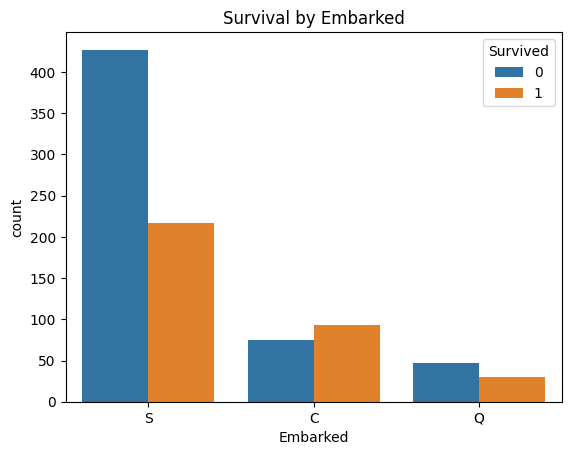

PassengerId    0.000000
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64


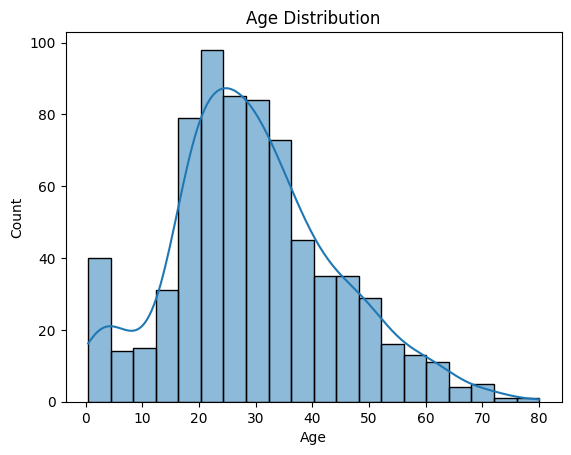

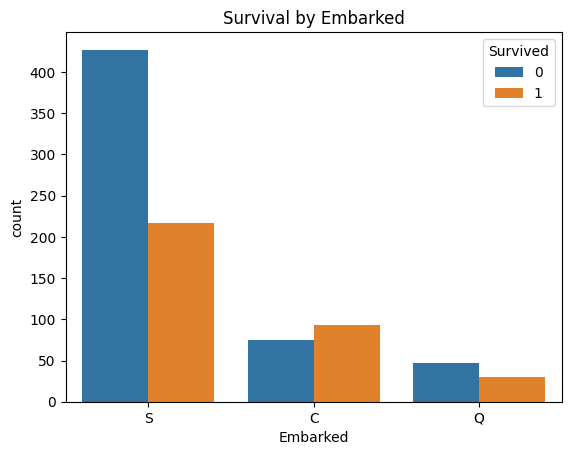

In [19]:
# Check skewness
print(df.select_dtypes(include=[np.number]).skew())

# Plot distribution for Age (drop NA to avoid errors)
sns.histplot(df['Age'].dropna(), kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Survival by Embarked location (handle missing Embarked values)
sns.countplot(x='Embarked', hue='Survived', data=df.dropna(subset=['Embarked']))
plt.title("Survival by Embarked")
plt.show()

# Check skewness
print(df.select_dtypes(include=[np.number]).skew())

# Plot distribution for Age (drop NA to avoid errors)
sns.histplot(df['Age'].dropna(), kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Survival by Embarked location (handle missing Embarked values)
sns.countplot(x='Embarked', hue='Survived', data=df.dropna(subset=['Embarked']))
plt.title("Survival by Embarked")
plt.show()

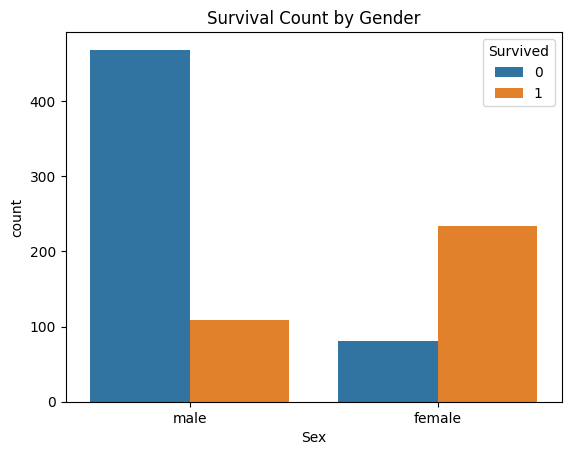

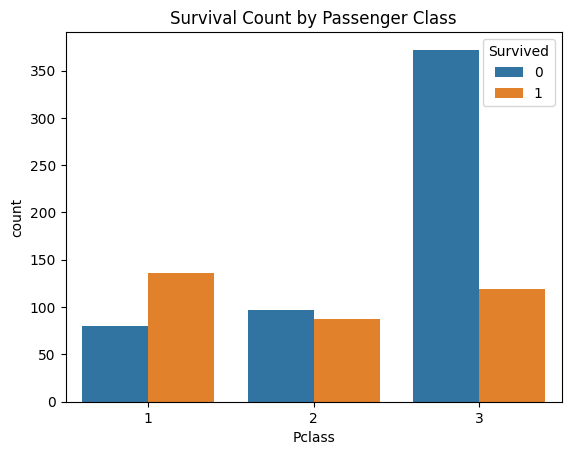

In [17]:
# Survival by gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Gender")
plt.show()

# Survival by class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival Count by Passenger Class")
plt.show()
